In [1]:
import numpy as np  
import pandas as pd  

In [8]:
ndvi="D:/Code/GeneralTool/File/tutorial_data/time_series.npy"
ndvi_date="D:/Code/GeneralTool/File/tutorial_data/time_series_date.txt"

ndvi_date = pd.read_csv(ndvi_date,header=None)[100:]
ndvi_date=pd.to_datetime(ndvi_date[0],format="%Y-%m-%d")

ndvi=pd.DataFrame(np.load(ndvi)[100:,200,3])
ndvi[ndvi<0]=np.nan
ndvi=ndvi.values[:,0]
ndvi_s=pd.Series(ndvi,index=ndvi_date).resample("M").mean().interpolate(limit_direction='both')


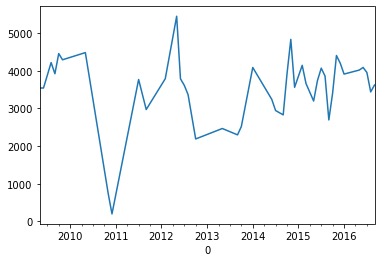

In [9]:
ndvi_s.plot()

In [10]:
# make pd series
print(ndvi_s.agg(['std', 'max','min','mean','count','any','all']))
print("Null count:    "+str(ndvi_s.isnull().sum()))
ndvi_s[:5]

std      969.703
max         5447
min          200
mean     3320.78
count         89
any         True
all         True
dtype: object
Null count:    0


0
2009-05-31    3542.00
2009-06-30    3542.00
2009-07-31    3879.75
2009-08-31    4217.50
2009-09-30    3921.00
Freq: M, dtype: float64

### generator

In [6]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

### Interpolate

In [ ]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
fig, ax = plt.subplots(2)
ndvi_s.plot(ax=ax[0])
ndvi_s_int=ndvi_s.interpolate(limit_direction='both')
ndvi_s_int.plot(ax=ax[1]) 

### resample

for s,min,h,days,week,month,year

end of: S,T,H,D,W,M,A

start of : ..., HS, DS, WS

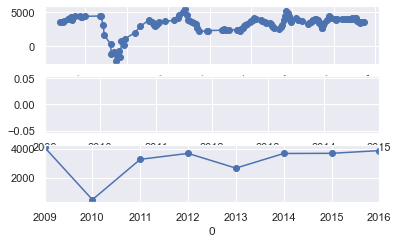

In [264]:
# Data Transfer
fig, ax = plt.subplots(3)
ndvi_s_int.index.to_period("A")
ndvi_s_int.plot(ax=ax[0],style="o-")
# Data Selection
ndvi_s_int.asfreq("Y").plot(ax=ax[1],style="o-")

# shrink
ndvi_s_int.resample("Y").mean().plot(ax=ax[2],style="o-")

# extend
ndvi_s_int.resample("M").asfreq().reindex(ndvi_s_int.index).interpolate()


### Calculation

In [266]:
ndvi_s_int[ndvi_s_int>500]

ndvi_s_int+10
np.exp(ndvi_s_int) #abs,sign

#计算减
ndvi_s_int-100

ndvi_s_int+ndvi_s_int


D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


0
2009-05-19    7084.0
2009-06-20    7084.0
2009-06-28    7504.0
2009-07-30    7924.0
2009-08-15    8344.0
               ...  
2016-08-18    6878.0
2016-08-26    7060.0
2016-09-03    7242.0
2016-09-11    7242.0
2016-09-27    7242.0
Length: 135, dtype: float64

2000-01-01 00:00:00    0.5
2000-01-01 06:00:00    2.5
2000-01-01 12:00:00    4.5
2000-01-01 18:00:00    6.5
2000-01-02 00:00:00    8.0
Freq: 6H, dtype: float64

In [255]:
series.asfreq('2H')

2000-01-01 00:00:00    0.0
2000-01-01 02:00:00    NaN
2000-01-01 04:00:00    NaN
2000-01-01 06:00:00    2.0
2000-01-01 08:00:00    NaN
2000-01-01 10:00:00    NaN
2000-01-01 12:00:00    4.0
2000-01-01 14:00:00    NaN
2000-01-01 16:00:00    NaN
2000-01-01 18:00:00    6.0
2000-01-01 20:00:00    NaN
2000-01-01 22:00:00    NaN
2000-01-02 00:00:00    8.0
Freq: 2H, dtype: float64